In [1]:
import pandas as pd

# Load Primary Elections Data

In [12]:
df = pd.read_json("https://www.urbanresearchmaps.org/nycrcv2025/data/mayor2025rcv_ed_certified.json")
df.to_csv("primary_results.csv", index=False)
primary_data = df[['districtid']]
primary_data['mamdani_raw'] = df['mamdani9']
primary_data['cuomo_raw'] = df['cuomo9']
primary_data['mamdani_pct'] = df['mamdani9'] / df['total9'] * 100
primary_data['cuomo_pct'] = df['cuomo9'] / df['total9'] * 100
primary_data.sort_values(by='districtid')

/tmp/ipykernel_60918/2095828161.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data['mamdani_raw'] = df['mamdani9']
/tmp/ipykernel_60918/2095828161.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primary_data['cuomo_raw'] = df['cuomo9']
/tmp/ipykernel_60918/2095828161.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,districtid,mamdani_raw,cuomo_raw,mamdani_pct,cuomo_pct
44,23001,43,134,21.287129,66.336634
45,23002,36,121,21.052632,70.760234
46,23003,13,27,26.530612,55.102041
47,23004,57,196,21.348315,73.408240
48,23005,58,202,20.714286,72.142857
...,...,...,...,...,...
4031,87048,89,117,41.395349,54.418605
4032,87049,70,223,22.653722,72.168285
4033,87050,36,71,31.858407,62.831858
4034,87051,31,79,26.050420,66.386555


In [3]:
df = pd.read_csv("https://www.urbanresearchmaps.org/ElectionCompare2025/unofficial25results.csv")
general_data = df[['aded25', 'gen25zm', 'gen25ac', 'gen25cs', 'gen25tot']]
general_data['mamdani_raw'] = df['gen25zm']
general_data['cuomo_raw'] = df['gen25ac']
general_data['sliwa_raw'] = df['gen25cs']
general_data['mamdani_pct'] = df['gen25zm'] / df['gen25tot'] * 100
general_data['cuomo_pct'] = df['gen25ac'] / df['gen25tot'] * 100
general_data['sliwa_pct'] = df['gen25cs'] / df['gen25tot'] * 100
general_data

/tmp/ipykernel_60918/1734010085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_data['mamdani_raw'] = df['gen25zm']
/tmp/ipykernel_60918/1734010085.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general_data['cuomo_raw'] = df['gen25ac']


,aded25,gen25zm,gen25ac,gen25cs,gen25tot,mamdani_raw,cuomo_raw,sliwa_raw,mamdani_pct,cuomo_pct,sliwa_pct
0,23001,78,662,346,1094,78,662,346,7.129799,60.511883,31.627057
1,23002,75,627,369,1078,75,627,369,6.957328,58.163265,34.230056
2,23003,33,184,157,376,33,184,157,8.776596,48.936170,41.755319
3,23004,102,757,226,1092,102,757,226,9.340659,69.322344,20.695971
4,23005,82,731,274,1091,82,731,274,7.516040,67.002750,25.114574
...,...,...,...,...,...,...,...,...,...,...,...
4333,87051,136,148,11,299,136,148,11,45.484950,49.498328,3.678930
4334,87052,105,96,5,208,105,96,5,50.480769,46.153846,2.403846
4335,87053,0,0,0,0,0,0,0,NaN,NaN,NaN
4336,87054,0,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
df = primary_data.merge(general_data, left_on='districtid', right_on='aded25', suffixes=('_primary', '_general'))
df

,districtid,mamdani_raw_primary,cuomo_raw_primary,mamdani_pct_primary,cuomo_pct_primary,aded25,gen25zm,gen25ac,gen25cs,gen25tot,mamdani_raw_general,cuomo_raw_general,sliwa_raw,mamdani_pct_general,cuomo_pct_general,sliwa_pct
0,23055,43,19,67.187500,29.687500,23055,128,64,23,216,128,64,23,59.259259,29.629630,10.648148
1,23056,33,33,50.000000,50.000000,23056,116,83,24,225,116,83,24,51.555556,36.888889,10.666667
2,23057,73,34,66.363636,30.909091,23057,157,96,45,300,157,96,45,52.333333,32.000000,15.000000
3,23058,34,24,55.737705,39.344262,23058,58,226,163,449,58,226,163,12.917595,50.334076,36.302895
4,23059,12,32,24.000000,64.000000,23059,27,254,113,394,27,254,113,6.852792,64.467005,28.680203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,87048,89,117,41.395349,54.418605,87048,247,176,46,471,247,176,46,52.441614,37.367304,9.766454
4032,87049,70,223,22.653722,72.168285,87049,204,232,33,475,204,232,33,42.947368,48.842105,6.947368
4033,87050,36,71,31.858407,62.831858,87050,102,120,11,233,102,120,11,43.776824,51.502146,4.721030
4034,87051,31,79,26.050420,66.386555,87051,136,148,11,299,136,148,11,45.484950,49.498328,3.678930


In [5]:
df['diff'] = df['mamdani_pct_general'] - df['mamdani_pct_primary']
df = df[['districtid', 'mamdani_pct_primary', 'mamdani_raw_primary', 'cuomo_raw_primary', 'mamdani_pct_general', 'mamdani_raw_general', 'cuomo_raw_general', 'diff']]
df.sort_values(by='diff', ascending=False)

,districtid,mamdani_pct_primary,mamdani_raw_primary,cuomo_raw_primary,mamdani_pct_general,mamdani_raw_general,cuomo_raw_general,diff
1987,55031,11.538462,3,22,70.588235,12,5,59.049774
1974,55018,0.000000,0,1,53.846154,14,11,53.846154
742,37010,0.000000,0,1,50.000000,2,2,50.000000
1990,55034,19.047619,16,64,68.275862,99,43,49.228243
2182,58019,21.052632,40,142,67.845659,211,96,46.793028
...,...,...,...,...,...,...,...,...
1047,40036,100.000000,1,0,35.897436,14,16,-64.102564
3371,75067,100.000000,1,0,35.714286,5,8,-64.285714
1390,45055,100.000000,2,0,33.333333,1,1,-66.666667
111,24033,100.000000,4,0,18.918919,7,27,-81.081081


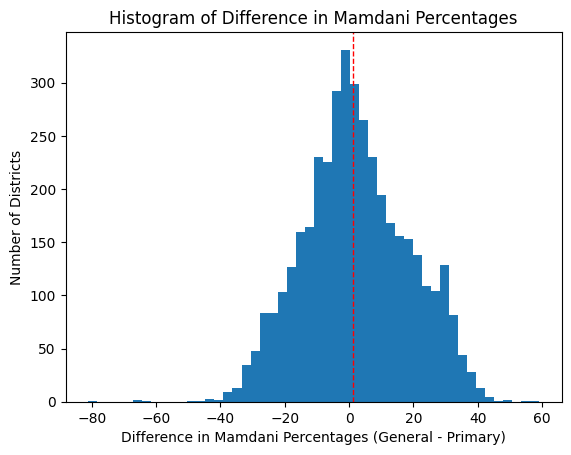

In [6]:
# show a histogram of the diff
import matplotlib.pyplot as plt
plt.hist(df['diff'], bins=50)
plt.title('Histogram of Difference in Mamdani Percentages')
plt.xlabel('Difference in Mamdani Percentages (General - Primary)')
plt.ylabel('Number of Districts')
# show the median
plt.axvline(df['diff'].median(), color='red', linestyle='dashed', linewidth=1)
plt.show()

In [11]:
df['diff_without_sliwa'] = (df['mamdani_raw_general'] / (df['mamdani_raw_general'] + df['cuomo_raw_general']) * 100) - \
                           (df['mamdani_raw_primary'] / (df['mamdani_raw_primary'] + df['cuomo_raw_primary']) * 100)

/tmp/ipykernel_60918/4002885374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diff_without_sliwa'] = (df['mamdani_raw_general'] / (df['mamdani_raw_general'] + df['cuomo_raw_general']) * 100) - \


In [10]:
df.to_csv("mamdani_comparison.csv", index=False)